In [ ]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/data.csv")
genre_data = pd.read_csv('/content/data_by_genres.csv')
year_data = pd.read_csv('/content/data_by_year.csv')

In [ ]:
print(data.info())
print(genre_data.info())
print(year_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138725 entries, 0 to 138724
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           138725 non-null  float64
 1   year              138725 non-null  int64  
 2   acousticness      138725 non-null  float64
 3   artists           138725 non-null  object 
 4   danceability      138725 non-null  float64
 5   duration_ms       138725 non-null  int64  
 6   energy            138725 non-null  float64
 7   explicit          138724 non-null  float64
 8   id                138724 non-null  object 
 9   instrumentalness  138724 non-null  float64
 10  key               138724 non-null  float64
 11  liveness          138724 non-null  float64
 12  loudness          138724 non-null  float64
 13  mode              138724 non-null  float64
 14  name              138724 non-null  object 
 15  popularity        138724 non-null  float64
 16  release_date      13

In [ ]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

X, y = data[feature_names], data['popularity']

In [ ]:
X = np.nan_to_num(X)
y = np.nan_to_num(y)

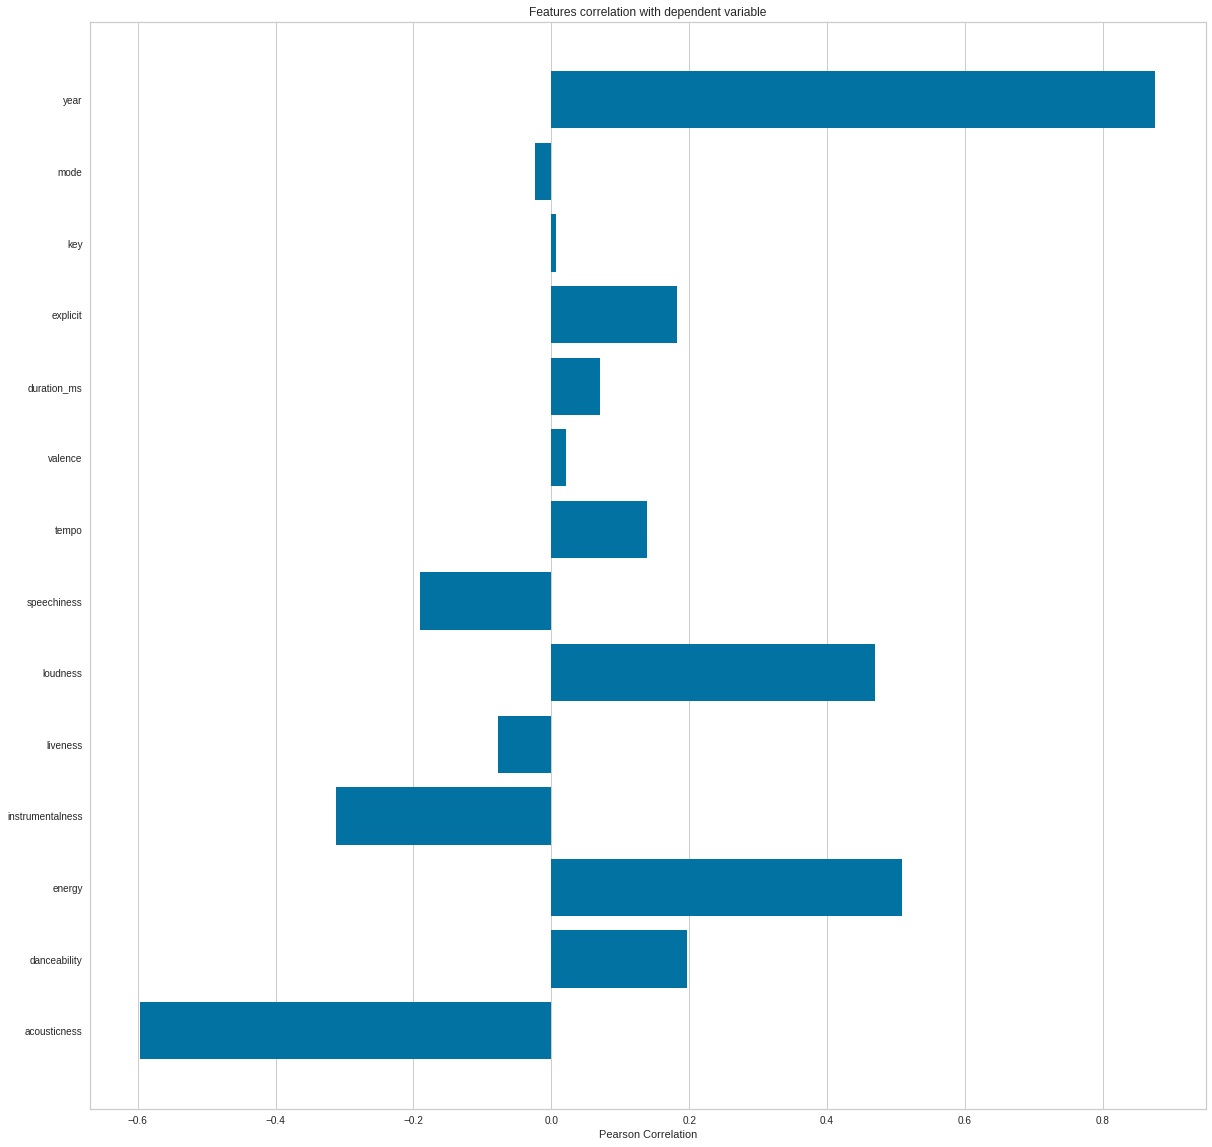

In [ ]:
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

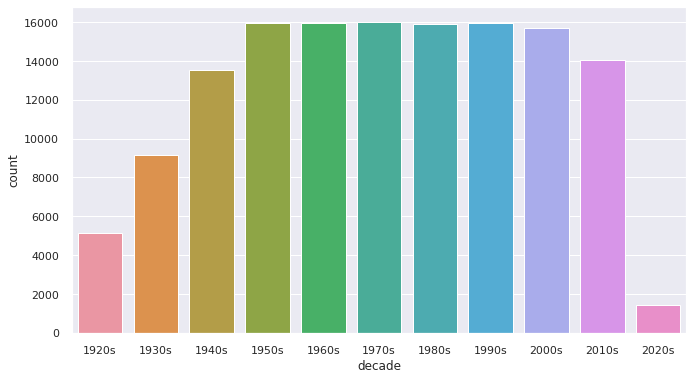

In [ ]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

data['decade'] = data['year'].apply(get_decade)

sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(data['decade'])

In [ ]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(year_data, x='year', y=sound_features)
fig.show()